# Developing and testing $(\partial Y / \partial T)_P$ miscibility derivative

In [19]:
from misc import misc
from eos import cms_eos

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rc('text', usetex=False)
plt.rc('font', family='serif',size=20)
plt.rc('axes', linewidth=1.25)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20, direction='in')
plt.rc('ytick', labelsize=20, direction='in')
plt.rc('legend', fontsize=10)

plt.rc('xtick.major',size=10,pad=8)
plt.rc('xtick.minor',size=5,pad=8)
plt.rc('ytick.major',size=10)
plt.rc('ytick.minor',size=5)

In [20]:
def get_dydt_misc(logp, logt, misc_curve, dt=0.1):
    T0 = 10**logt
    T1 = T0*(1+dt)
    Y0 = misc.get_y_misc(logp, logt, misc_curve)
    Y1 = misc.get_y_misc(logp, np.log10(T1), misc_curve)

    return (Y1 - Y0)/(T1 - T0)

def get_dyds_misc(logp, logt, misc_curve, dt=0.1):
    T0 = 10**logt
    T1 = T0*(1+dt)
    Y0 = misc.get_y_misc(logp, logt, misc_curve)
    Y1 = misc.get_y_misc(logp, np.log10(T1), misc_curve)

    S0 = cms_eos.get_s_pt(logp, logt, Y0)
    S1 = cms_eos.get_s_pt(logp, logt, Y1)

    return (Y1 - Y0)/(S1 - S0)

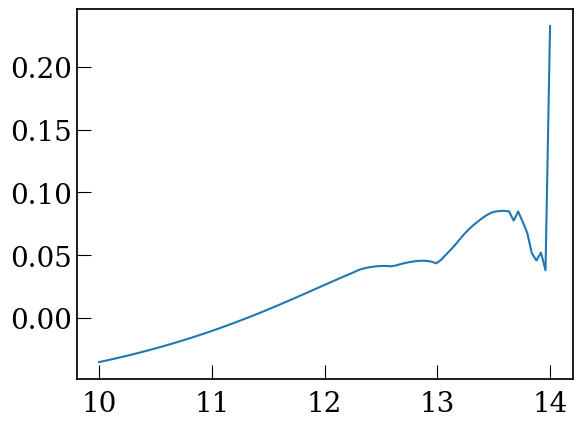

In [17]:
logpgrid = np.linspace(10, 14, 100)
logtgrid = np.linspace(3, 4, 100)

Y = misc.get_y_misc(logpgrid, logtgrid, misc='l')

plt.plot(logpgrid, Y)
plt.show()


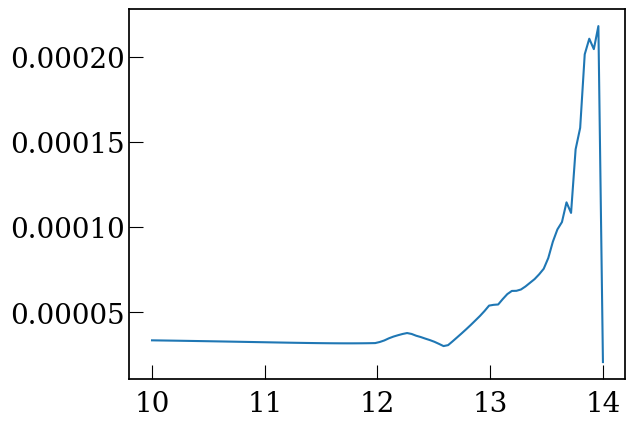

In [18]:
dydt = get_dydt_misc(logpgrid, logtgrid, misc_curve='l')
plt.plot(logpgrid, dydt)

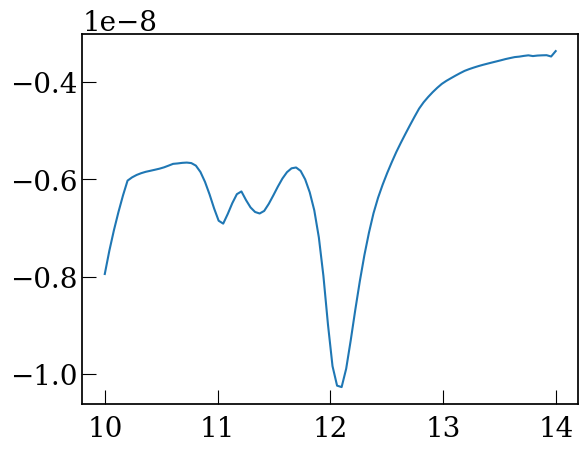

In [21]:
dyds = get_dyds_misc(logpgrid, logtgrid, misc_curve='l')
plt.plot(logpgrid, dyds)